## Discrete Dynamical Systems: First-Order Difference Equations

This lecture note will illustrate one common kind of application of eigenvalues: to the study of the long-term behavior (or steady-state response) of a dynamical system described by a **difference equation**.
We will introduce stochastic matrics, which encode this type of difference equation.  

### Difference Equations

**Definition 18.1.** A *difference equation* is an an equation of the form
$$ \vec{v}_{k+1} = A\vec{v}_k \hspace{2in} $$
for an $n\times n$ matrix $A$ (called a transition matrix) and vectors $\vec{v}_0, \vec{v}_1,, \vec{v}_2, ...$ in $\mathbb{R}^n$. Here
  * $\vec{v}_k$ is the "state at time $k$," and
  * $\vec{v}_{k+1}$ is the "state at time $k+1$." 

Observe that
$$ \vec{v}_k = A\vec{v}_{k-1} = A^2\vec{v}_{k-2} = \cdots = A^k\vec{v}_0.$$
This should hint to you that the long-term behavior of a difference equation (when $k\rightarrow\infty$) is an eigenvalue problem.

**Example 18.2.**  In a population of rabbits,
   1. half of the newborn rabbits survive their first year;
   2. of those, half survive their second year;
   3. the maximum life span is three years;
   4. rabbits produce 0, 6, 8 rabbits in their first, second, and third years, respectively.

Let $\vec{p}_k=(x_k, y_k, z_k)$ be the population vector whose entries $x_k, y_k, z_k$ are the number of rabbits aged 0, 1, and 2, respectively.  
A population vector $\vec{p}$ contains the abundance of rabbits in each age group. We can use the fertility and survival of each age group to predict the abundance of each group after one year:

$$\begin{align*}
  x_{k+1} &=& 0\,x_k + 6\,y_k + 8\,z_k \\
  y_{k+1} &=& 0.5\,x_k + 0\,y_k + 0\,z_k \\
  z_{k+1} &=& 0\,x_k + 0.5\,y_k + 0\,z_k
\end{align*}
$$

The superscript $k$ refers to the year. The coefficient matrix of this system of equations is:

$$ A = \begin{bmatrix} 0 & 6 & 8 \\
                       0.5 & 0 & 0 \\
                       0 & 0.5 & 0 \end{bmatrix}
$$

This matrix represents the _age transition_ year on year. Multiply this matrix by the population vector to get the age-structured population on the next year. Let's write a bit of code to see the population in each age group grow over 10 years. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
A = np.array([[0,6,8], [0.5,0,0], [0,0.5,0]])
A

array([[0. , 6. , 8. ],
       [0.5, 0. , 0. ],
       [0. , 0.5, 0. ]])

In [5]:
p = np.array([25, 10, 5]) # initial age-structured population

In [6]:
N = 10
pn = np.zeros((N, len(p)))
pn[0,:] = p.copy()
for i in range(1,N):
    pn[i,:] = A.dot(pn[i-1,:])
    print(pn[i,:])

[100.   12.5   5. ]
[115.    50.     6.25]
[350.   57.5  25. ]
[545.   175.    28.75]
[1280.   272.5   87.5]
[2335.    640.    136.25]
[4930.  1167.5  320. ]
[9565.   2465.    583.75]
[19460.   4782.5  1232.5]


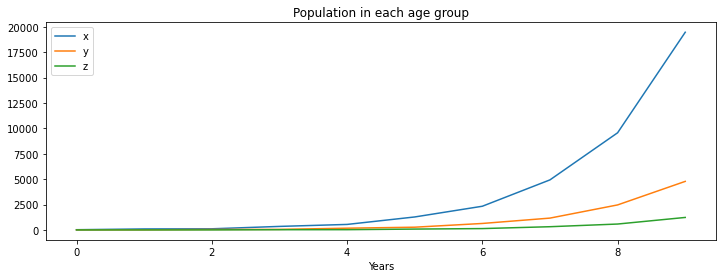

In [7]:
plt.figure(figsize=(12,4))
plt.plot(pn[:,0], label='x')
plt.plot(pn[:,1], label='y')
plt.plot(pn[:,2], label='z')
plt.legend()
#plt.grid()
plt.xlabel('Years')
plt.title('Population in each age group');

Nothing to see here: the population in each age group grows over time. But one question ecologists may need to answer is whether the species reaches a stable growth pattern, and what is the _stable age distribution_. That occurs if the percentage in each age group remains the same, i.e., 
$\vec{p}_{k+1}$ is a multiple of $\vec{p}_k$:

$$ \vec{p}_{k+1} = A\, \vec{p}_k = r\, \vec{p}_k $$

We have on the right an eigenvalue problem, and the stable age distribution is an eigenvector of the age transition matrix.

**Example 18.3.** A classic example in this field is the hypothetical beetle population of Bernadelli (Bernardelli, H. (1941), Population waves, Journal of the Burma Research Society 31, Part 1. Also in _Mathematical Demography, Selected Papers_ (1977), pp. 215-219. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-642-81046-6_24), also separated in three age groups, and with age transition matrix:

$$ T = \begin{bmatrix} 0 & 0 & 6 \\
                       1/2 & 0 & 0 \\
                       0 & 1/3 & 0 \end{bmatrix}
$$

In [8]:
T = np.array([[0,0,6], [0.5,0,0], [0,1/3,0]])

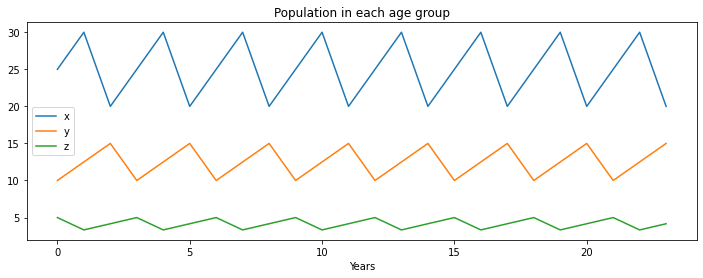

In [9]:
p = np.array([25, 10, 5])
N = 24
pn = np.zeros((N, len(p)))
pn[0,:] = p.copy()
for i in range(1,N):
    pn[i,:] = T.dot(pn[i-1,:])
    
plt.figure(figsize=(12,4))
plt.plot(pn[:,0], label='x')
plt.plot(pn[:,1], label='y')
plt.plot(pn[:,2], label='z')
plt.legend()
#plt.grid()
plt.xlabel('Years')
plt.title('Population in each age group');

In [10]:
print(pn[6,:])

[25. 10.  5.]


In this case, the initial population distribution repeats every few years! If we look at the eigenvalues for the matrix, in this case, they are complex numbers.
In Python, complex numbers are represented as the sum of a real part and an imaginary part, using the symbol `j` for the imaginary unit corresponding to $\sqrt{-1}$.

In [11]:
np.linalg.eig(T)[0]

array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ])

#### Compute eigenthings in Python  

You can compute the eigenvalues and eigenvectors of a matrix using [`numpy.linalg.eig()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html). It returns a tuple: its first element is an array with the eigenvalues, and its second element is a 2D array  where each column is an eigenvector.

In [12]:
np.linalg.eig(A)[0]

array([ 2.        , -0.99999998, -1.00000002])

In [13]:
np.linalg.eig(A)[1]

array([[-0.96836405,  0.87287156, -0.87287157],
       [-0.24209101, -0.43643579,  0.43643577],
       [-0.06052275,  0.2182179 , -0.21821788]])

In [14]:
# display each eigenvalue with the corresponding eigenvector, side by side
eigenvalues, eigenvectors = np.linalg.eig(A)

for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T):
    print(eigenvalue, eigenvector)

2.0000000000000013 [-0.96836405 -0.24209101 -0.06052275]
-0.9999999789753345 [ 0.87287156 -0.43643579  0.2182179 ]
-1.0000000210246673 [-0.87287157  0.43643577 -0.21821788]


In the `for` statement above, each iteration picks an eigenvalue, and the corresponding eigenvector. Note that when iterating over a 2D array, the natural order advances over the first dimension: the rows; to get the columns, we apply the transpose of the `eigenvectors` matrix. Here, we used the [`numpy.ndarray.T`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html), which has the same effect as `.transpose`.

**Remark.** To create the diagonal matrix of eigenvalues, use [`numpy.diag()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html): if you give it a 1D array, it returns a 2D array with the elements of the input array in the diagonal. 

In [15]:
L =np.array([1, 2, 3])
print(np.diag(L))

[[1 0 0]
 [0 2 0]
 [0 0 3]]


**Activity 18.4.** In a certain town, 30 percent of the married women get divorced each year and 20 percent of the single women get married each year. There are 8000 married women and 2000 single women, 
and the total population remains constant. Let us investigate the long-range prospects if
these percentages of marriages and divorces continue indefinitely into the future.

  * (a) Set up a difference equation for this problem.
  * (b) Find the number of married and single women after 5, 10, 15, 20, and 30 years. What do you observe?

**Solution**

Let $m$ represent the number of married women and $s$ the number of single women. The corresponding mathematical model is
$$\begin{align*}
  m_{k+1} &=& 0.7\,m_k + 0.2\,s_k\\
  s_{k+1} &=& 0.3\,m_k + 0.8\,s_k
\end{align*}
$$

Let $\vec{p}_k = (m_k, s_k)$ be the population vector. Then the difference equation has the form
$$
 \vec{p}_{k+1} = M\vec{p}_k, 
$$
where 
$$ M = \begin{bmatrix} 0.7 & 0.2 \\
                       0.3 & 0.8 
       \end{bmatrix}
$$.

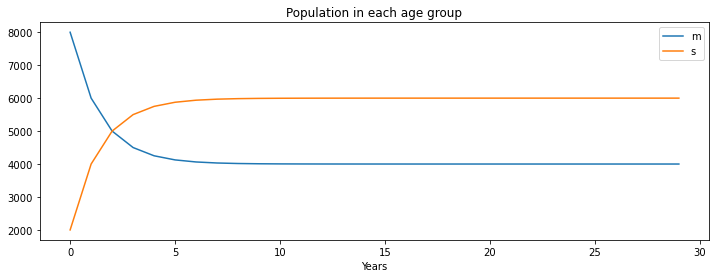

In [16]:
M = np.array([[0.7,0.2], [0.3,0.8]])

p = np.array([8000, 2000])
N = 30
pn = np.zeros((N, len(p)))
pn[0,:] = p.copy()

for i in range(1,N):
    pn[i,:] = M.dot(pn[i-1,:])
    
plt.figure(figsize=(12,4))
plt.plot(pn[:,0], label='m')
plt.plot(pn[:,1], label='s')
plt.legend()
#plt.grid()
plt.xlabel('Years')
plt.title('Population in each age group');

In [17]:
for i in range(0,N):
    print('k = %3d  %6d  %6d'  % (i, pn[i,0], pn[i,1]) )

k =   0    8000    2000
k =   1    6000    4000
k =   2    5000    5000
k =   3    4500    5500
k =   4    4250    5750
k =   5    4125    5875
k =   6    4062    5937
k =   7    4031    5968
k =   8    4015    5984
k =   9    4007    5992
k =  10    4003    5996
k =  11    4001    5998
k =  12    4000    5999
k =  13    4000    5999
k =  14    4000    5999
k =  15    4000    5999
k =  16    4000    5999
k =  17    4000    5999
k =  18    4000    5999
k =  19    4000    5999
k =  20    4000    5999
k =  21    4000    5999
k =  22    4000    5999
k =  23    4000    5999
k =  24    4000    5999
k =  25    4000    5999
k =  26    4000    5999
k =  27    4000    5999
k =  28    4000    5999
k =  29    4000    5999


### Markov Chains

In Activity 18.4, we studied a simple matrix model for predicting the number of married
and single women in a certain town each year. Given an initial vector $\vec{p}_0$ whose coordinates represent 
the current number of married and single women, we were able to
predict the number of married and single women in future years by computing
$$ 
 \vec{p}_1 = M\vec{p}_0,\ \ \ \vec{p}_2 = M\vec{p}_1,\ \ \ \vec{p}_3 = M\vec{p}_2,\ \  ...
$$

If we scale the initial vector so that its entries indicate the **proportions of the population**
that are married and single, then the coordinates of $\vec{p}_k$ will indicate the proportions of
married and single women after n years. The sequence of vectors that we generate in
this manner is an example of a **Markov chain**. 

**Definition 18.5** A *stochastic process* is any sequence of experiments for which the outcome at
any stage depends on chance. A Markov process is a stochastic process with the
following properties:
  1. The set of possible outcomes or states is finite.
  2. The probability of the next outcome depends only on the previous outcome.
  3. The probabilities are constant over time.
  
**Remark** The sum of entries of $\vec{p}_k$ should be equal to $1$,
since it’s a probability distribution.

**Example 18.6.** A car dealer leases four types of vehicles: *four-door sedans*, *sports cars*, 
*minivans*, and *SUV*. The term of the lease is 2
years. At the end of the term, customers must renegotiate the lease and choose a new
vehicle.

The car leasing can be viewed as a process with four possible outcomes.
The probability of each outcome can be estimated by reviewing records of previous
leases. The records indicate that 80 percent of the customers currently leasing sedans
will continue doing so in the next lease. Furthermore, 10 percent of the customers currently 
leasing sports cars will switch to sedans. In addition, 5 percent of the customers
driving minivans or sport utility vehicles will also switch to sedans. These results are
summarized in the first row of Table 1. The second row indicates the percentages of
customers that will lease sports cars the next time, and the final two rows give the
percentages that will lease minivans and SUV, respectively.

<center>
   <img src="lecture18-fig3.png" style="width: 400px;"/> 
</center>
    
Suppose that initially there are 200 sedans leased and 100 of each of the other three
types of vehicles. If we set
$$ 
  A = \begin{bmatrix} 
        0.80 & 0.10 & 0.05 & 0.05 \\ 
        0.10 & 0.80 & 0.05 & 0.05 \\
        0.05 & 0.05 & 0.80 & 0.10 \\
        0.05 & 0.05 & 0.10 & 0.80
       \end{bmatrix}
       \ \ \ \ \ \ \ \ \ \ 
   \vec{x}_0 = 
    \begin{bmatrix}
       200\\ 100 \\ 100 \\ 100
    \end{bmatrix}
$$
then we can determine how many people will lease each type of vehicle two years later
by setting
$$
 \vec{x}_1 = A\vec{x}_0 = \begin{bmatrix} 
        0.80 & 0.10 & 0.05 & 0.05 \\ 
        0.10 & 0.80 & 0.05 & 0.05 \\
        0.05 & 0.05 & 0.80 & 0.10 \\
        0.05 & 0.05 & 0.10 & 0.80
       \end{bmatrix}
    \begin{bmatrix}
       200\\ 100 \\ 100 \\ 100
    \end{bmatrix}
     =
     \begin{bmatrix}
       180\\ 110\\ 105\\ 105
     \end{bmatrix}
$$

We can predict the numbers for future leases by setting
$$
 \vec{x}_{k+1} = A\vec{x}_k \ \ \mbox{for}\ n = 1, 2, ...
$$
The vectors $\vec{x}_i$ produced in this manner are referred to as **state vectors**, and 
the sequence
of state vectors is called a **Markov chain**. The matrix $A$ is referred to as a *transition
matrix*. The entries of each column of $A$ are nonnegative numbers that add up to 1.
Each column can be viewed as a probability vector. For example, the first column of
$A$ corresponds to individuals currently leasing sedans. The entries in this column are
the probabilities of choosing each type of vehicle when the lease is renewed.



If we divide the entries of the initial vector by 500 (the total number of customers),
then the entries of the new initial state vector
$$
 \vec{x}_0 = (0.40, 0.20, 0.20, 0.20)^T
$$
represent the proportions of the population that rent each type of vehicle. The entries
of $\vec{x}_1$  will represent the proportions for the next lease. Thus, $\vec{x}_0$ and $\vec{x}_1$ are probability
vectors, and it is easily seen that the succeeding state vectors in the chain will all be
probability vectors.

k =   1  0.36  0.22  0.21 0.21
k =   2  0.33  0.23  0.22 0.22
k =   3  0.31  0.24  0.22 0.22
k =   4  0.29  0.25  0.23 0.23
k =   5  0.28  0.25  0.23 0.23
k =   6  0.27  0.25  0.24 0.24
k =   7  0.27  0.25  0.24 0.24
k =   8  0.26  0.25  0.24 0.24
k =   9  0.26  0.25  0.24 0.24
k =  10  0.26  0.25  0.24 0.24
k =  11  0.26  0.25  0.25 0.25
k =  12  0.25  0.25  0.25 0.25
k =  13  0.25  0.25  0.25 0.25
k =  14  0.25  0.25  0.25 0.25
k =  15  0.25  0.25  0.25 0.25
k =  16  0.25  0.25  0.25 0.25
k =  17  0.25  0.25  0.25 0.25
k =  18  0.25  0.25  0.25 0.25
k =  19  0.25  0.25  0.25 0.25


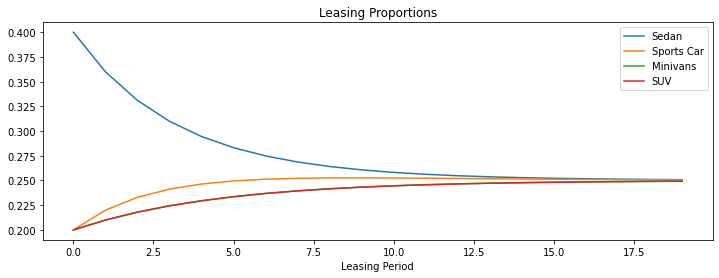

In [4]:
B = np.array([[0.80, 0.10, 0.05, 0.05], [00.10, 0.80, 0.05, 0.05],
              [0.05, 0.05, 0.80, 0.10], [0.05, 0.05, 0.10, 0.80]])

p = np.array([0.4, 0.2, 0.2, 0.2])
N = 20
pn = np.zeros((N, len(p)))
pn[0,:] = p.copy()

for i in range(1,N):
    pn[i,:] = B.dot(pn[i-1,:])
    print('k = %3d  %3.2f  %3.2f  %3.2f %3.2f'  % (i, pn[i,0], pn[i,1], pn[i,2], pn[i,3]) )
    
plt.figure(figsize=(12,4))
plt.plot(pn[:,0], label='Sedan')
plt.plot(pn[:,1], label='Sports Car')
plt.plot(pn[:,2], label='Minivans')
plt.plot(pn[:,3], label='SUV')
plt.legend()
#plt.grid()
plt.xlabel('Leasing Period')
plt.title('Leasing Proportions');

As $k$ increases, $\vec{x}_k$ approaches the **steady-state** vector
$$
 \vec{x}_{ST} = (0.25, 0.25, 0.25, 0.25)^T
$$
Thus, the Markov chain model predicts that, in the long run, the leases will be divided
equally among the four types of vehicles.

Theoretically, the long-term behavior of the stochastic process can be determined by the eigenvalues and eigenvectors of the transition matrix $A$.

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(B)

for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T):
    print(eigenvalue, eigenvector)

0.9999999999999997 [-0.5 -0.5 -0.5 -0.5]
0.7 [-7.07106781e-01  7.07106781e-01 -7.44188381e-16 -8.13575913e-16]
0.7999999999999996 [ 0.5  0.5 -0.5 -0.5]
0.7 [-0.26314552  0.26314552 -0.65631885  0.65631885]


The eigenvalues of $A$ are $\lambda_1 = 1, \lambda_2 = 0.8$, and $\lambda_3 = \lambda_4 = 0.7$. 
Even though $A$ has multiple eigenvalues, it does have *four linearly
independent eigenvectors* and hence it can be diagonalized, $A = PDP^{-1}$. 

In [6]:
D = np.diag(eigenvalues)
print(D)

[[1.  0.  0.  0. ]
 [0.  0.7 0.  0. ]
 [0.  0.  0.8 0. ]
 [0.  0.  0.  0.7]]


In [7]:
P = np.array(eigenvectors)
print(P)

[[-5.00000000e-01 -7.07106781e-01  5.00000000e-01 -2.63145518e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01  2.63145518e-01]
 [-5.00000000e-01 -7.44188381e-16 -5.00000000e-01 -6.56318853e-01]
 [-5.00000000e-01 -8.13575913e-16 -5.00000000e-01  6.56318853e-01]]


In [8]:
Pinv = np.linalg.inv(P) #The inverse of P
print(Pinv)

[[-5.00000000e-01 -5.00000000e-01 -5.00000000e-01 -5.00000000e-01]
 [-7.07106781e-01  7.07106781e-01  2.83508510e-01 -2.83508510e-01]
 [ 5.00000000e-01  5.00000000e-01 -5.00000000e-01 -5.00000000e-01]
 [ 4.22897735e-17  4.22897735e-17 -7.61824832e-01  7.61824832e-01]]


Python 3.5 onwards also has an explicit operator for dot product, `@`

In [9]:
L = P@D@Pinv
print(L)

[[0.8  0.1  0.05 0.05]
 [0.1  0.8  0.05 0.05]
 [0.05 0.05 0.8  0.1 ]
 [0.05 0.05 0.1  0.8 ]]


Indeed, we see that $L = A$. 

**Matrix Powers.** Let's compute $A^{20}$ in two different way; one is directly with $A$ itself, the other uses its diagonalization 
$A^{20} = PD^{20}P^{-1}$. 

In [10]:
k = 20

In [11]:
%%timeit  # Time execution of a Python statement or expression in the cell. This magic command should come in the first line.
result = B.copy()
for _ in range(1,k):
    result = result @ B

33.5 µs ± 3.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Let's use diagonalization to do the same computation.

In [12]:
%%timeit
P @ D**k @ Pinv

5.29 µs ± 316 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Diagonalization computes $A^{k}$ much faster!

Now, ley's try to find the steady-state vector by computing $A^{k}$ with $k$ big enough, say $k=100$,

In [13]:
x0 = p
x100 = P @ D**(100) @ Pinv @x0
x100

array([0.25, 0.25, 0.25, 0.25])

In fact, 
$$\vec{x}_k = A^k\vec{x}_0 = PD^kP^{-1}\vec{x}_0 = 0.25*(1,1,1,1)^T - 0.05 (0.8)^k * (-1,-1,1,1)^T + 0.10 (0.7)^k* (1,-1,0,0)^T$$
Thus 
$$ \lim_{k\rightarrow\infty}\vec{x}_k = (0.25, 0.25, 0.25, 0.25)^T
$$

In general, we will assume that the initial vector $\vec{x}_0$  in a Markov chain is a probability vector, 
and this in turn implies that all of the state vectors are probability vectors.
One would expect, then, that if the chain converges to a steady-state vector $x$, then the
steady-state vector must also be a probability vector. This is indeed the case, as we see
in the next theorem.

**Theorem 18.7.** If a Markov chain with an $n\times n$ transition matrix $A$ converges to a steady-state
vector $\vec{x}_{ST}$, then 
  1. $\vec{x}_{ST}$ is a probability vector.
  2. $\lambda_1 = 1$ is an eigenvalue of $A$ and $\vec{x}_{ST}$ is an eigenvector corresponding to $\lambda_1$;
     $A\vec{x}_{ST} = \vec{x}_{ST}$.

**Remark.** In Example 18.6, python code yielded the eigenvector 
$(-0.5, -0.5, -0.5, -0.5)$ corresponding to $\lambda_1$. But 
$\vec{x}_{ST} = (0.25, 0.25, 0.25, 0.25)$. What happened? Remember that
$\vec{x}_{ST}$ should be a probability vectore and the sum of its entries
must be equal to $1$. So, we have to scale the vector $(-0.5, -0.5, -0.5, -0.5)$
by multiplying $\frac{1}{(-0.5) + (-0.5) + (-0.5) + (-0.5)} = -\frac{1}{2}$
to get $\vec{x}_{ST} = (0.25, 0.25, 0.25, 0.25)$.

### Exercises 

1. Each year, employees at a company are given the option of donating to a local charity as part of a payroll deduction plan. In general, 80 percent of the employees enrolled in the plan in any one year will choose to sign up again the following year, and 30 percent of the unenrolled will choose to enroll the following year. Determine the transition matrix for the Markov process and find the steady-state vector. What percentage of employees would you expect to find enrolled in the program in the long run?
2. A system consists of three servers, A, B and C. The specifications are as follows: “If server A is down, then the propability that server B is up 90% and the probability that  server C is up is 10%. Likewise, the diagram illustrates the probability of each server up when a server is down.  <center><img src="lecture18-fig4.png" style="width: 200px;"/>  </center> Determine the transition matrix for the Markov process and find the steady-state vector. What is the chance that server C is up when server A is down in the long run?